In [1]:
#Diabetes Prediction

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", '/Users/aryanpatil/Documents/SEMESTER 7/AIML IN HEALTHCARE HONOURS/MINI PROJECT HONOURS/diabetes.csv')

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.
Path to dataset files: /Users/aryanpatil/Documents/SEMESTER 7/AIML IN HEALTHCARE HONOURS/MINI PROJECT HONOURS/diabetes.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
diabetes = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.tail(-1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
diabetes.shape

(768, 9)

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Check how many zeroes in each column
(diabetes == 0).sum()


,0
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [10]:
#Replace 0 with NaN
import numpy as np

cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Replace 0s with NaN
diabetes[cols_with_zero] = diabetes[cols_with_zero].replace(0, np.nan)


In [11]:
#Replace missing values by median
diabetes[cols_with_zero] = diabetes[cols_with_zero].fillna(diabetes[cols_with_zero].median())


In [12]:
(diabetes == 0).sum()


,0
Pregnancies,111
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,500


In [13]:
#Summary statistics
print(diabetes.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.656250      72.386719      29.108073  140.671875   
std       3.369578   30.438286      12.096642       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  

In [14]:
# Class balance
print(diabetes['Outcome'].value_counts())

Outcome
0    500
1    268
Name: count, dtype: int64


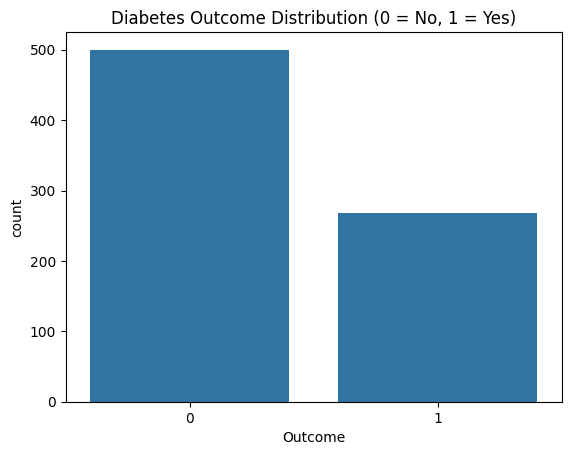

In [15]:
#Visualize the class balance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Outcome', data=diabetes)
plt.title("Diabetes Outcome Distribution (0 = No, 1 = Yes)")
plt.show()


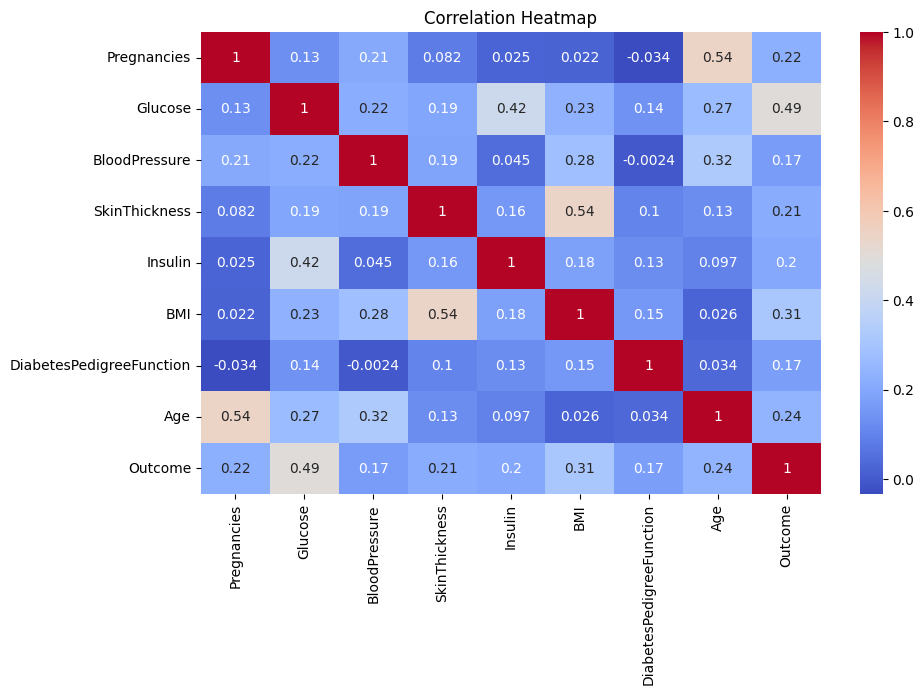

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(diabetes.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


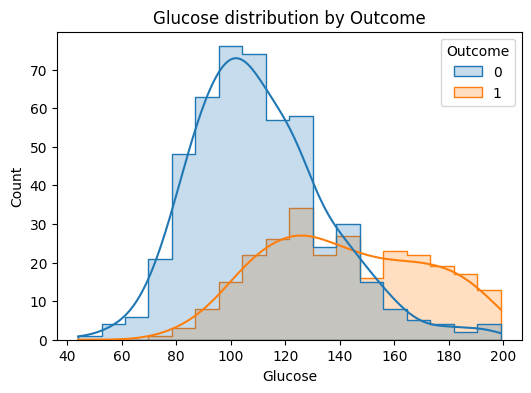

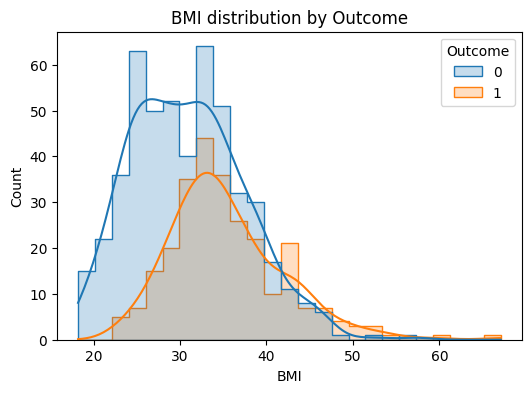

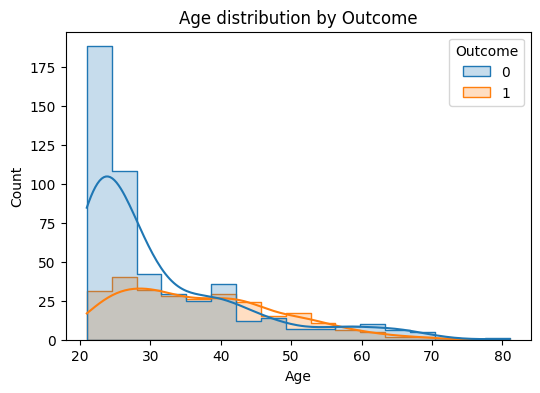

In [17]:
features = ['Glucose', 'BMI', 'Age']

for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=diabetes, x=col, hue="Outcome", kde=True, element="step")
    plt.title(f"{col} distribution by Outcome")
    plt.show()


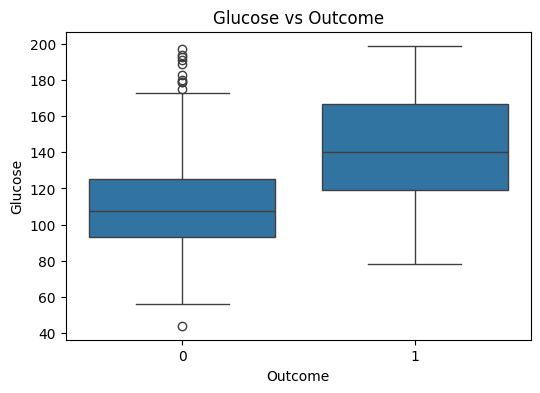

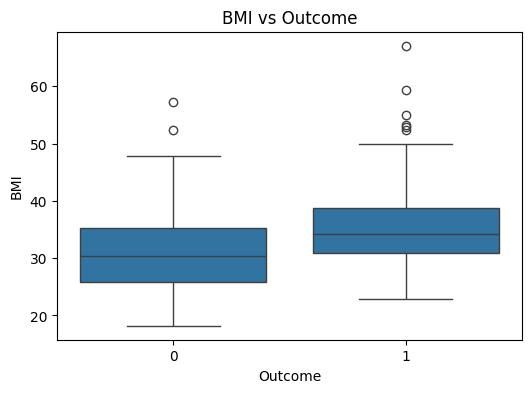

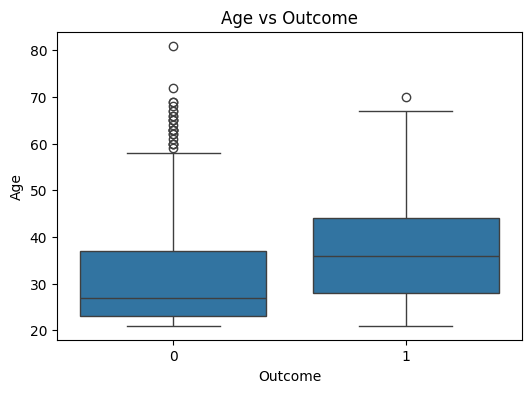

In [18]:
#Boxplot
for col in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Outcome", y=col, data=diabetes)
    plt.title(f"{col} vs Outcome")
    plt.show()


In [19]:
#Split into features and target
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
#Using the model logistic regression
from sklearn.linear_model import LogisticRegression

# Create model
log_reg = LogisticRegression(random_state=42)

# Train model on training data
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [23]:
y_pred = log_reg.predict(X_test)  # predicted labels
y_prob = log_reg.predict_proba(X_test)[:,1]  # probability of Outcome=1


In [24]:
#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7077922077922078

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Confusion Matrix:
 [[82 18]
 [27 27]]


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]  # probability of diabetes


In [26]:
#Evaluate Random Forest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7792207792207793

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154


Confusion Matrix:
 [[87 13]
 [21 33]]


In [27]:
new_patient = [[2, 120, 70, 30, 100, 25.0, 0.5, 30]]  # example features
new_patient_scaled = scaler.transform(new_patient)
prediction = rf_model.predict(new_patient_scaled)
probability = rf_model.predict_proba(new_patient_scaled)[:,1]

print("Prediction (0=No Diabetes, 1=Diabetes):", prediction[0])
print("Probability of Diabetes:", probability[0])


Prediction (0=No Diabetes, 1=Diabetes): 0
Probability of Diabetes: 0.07


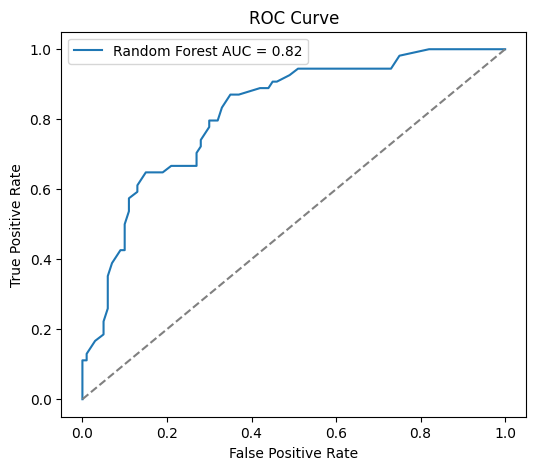

In [28]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicted probabilities for class 1 (diabetes)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'Random Forest AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--',color='gray')  # diagonal line = random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [29]:
#Save the model with job_lib
import joblib

# Save the model
joblib.dump(rf_model, 'diabetes_rf_model.pkl')

# Save the scaler as well (needed for new inputs)
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [30]:
# Load model and scaler
model = joblib.load('diabetes_rf_model.pkl')
scaler = joblib.load('scaler.pkl')

# Example: predict for a new patient
new_patient = [[2, 120, 70, 30, 100, 25.0, 0.5, 30]]  # example features
new_patient_scaled = scaler.transform(new_patient)

prediction = model.predict(new_patient_scaled)
probability = model.predict_proba(new_patient_scaled)[:,1]

print("Prediction (0=No Diabetes, 1=Diabetes):", prediction[0])
print("Probability of Diabetes:", probability[0])


Prediction (0=No Diabetes, 1=Diabetes): 0
Probability of Diabetes: 0.07
